In [1]:
# Initial imports
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.pyplot import plot

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data



In [2]:
# Loading data
df_loans = pd.read_csv("Resources/application_train.csv")
df_loans.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# cleaning the Data
df_loans = df_loans.fillna(0)

In [4]:
# x=df_loans.columns
# for i in x:
#     print(i)

In [4]:
# create Dummies Data
df_loans = pd.get_dummies(df_loans)
df_loans

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  ...  WALLSMATERIAL_MODE_Block  \
0                -637  ...                         0   
1               -1188  ...                         1   
2                -225  ...                         0   
3               -3039  ...                         0   
4               -3038  ...                         0   
...               ...  ...                       ...   
307506           -236  ...                         0   
307507         365243  ...                         0   
307508          -7921  ...                         0   
307509          -4786  ...                         0   
307510          -1262  ...                         0   

        WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
...                          ...                            ...   
307506                         0                              0   
307507                         0                              0   
307508                         0                              0   
307509                         0                              0   
307510                         0                              0   

        WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
307506                          0                         0   
307507                          0                         0   
307508                          0                         1   
307509                          0                 

In [6]:
# shape of DataFrame
print(df_loans.shape)

(307511, 252)


Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [5]:
# Define features set
X = df_loans[["EXT_SOURCE_3","DAYS_REGISTRATION", "YEARS_BEGINEXPLUATATION_AVG", "AMT_REQ_CREDIT_BUREAU_MON", "DEF_30_CNT_SOCIAL_CIRCLE" , "CNT_CHILDREN",
               "AMT_REQ_CREDIT_BUREAU_QRT",  "TOTALAREA_MODE", "CNT_FAM_MEMBERS", "OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "OWN_CAR_AGE", 
               "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_GOODS_PRICE", "HOUR_APPR_PROCESS_START", "EXT_SOURCE_1", "AMT_CREDIT", "AMT_INCOME_TOTAL", "REGION_POPULATION_RELATIVE",
                 "DAYS_LAST_PHONE_CHANGE", "AMT_ANNUITY", "DAYS_EMPLOYED", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH", "DAYS_BIRTH"]]

X.head()

EXT_SOURCE_3  DAYS_REGISTRATION  YEARS_BEGINEXPLUATATION_AVG  \
0      0.139376            -3648.0                       0.9722   
1      0.000000            -1186.0                       0.9851   
2      0.729567            -4260.0                       0.0000   
3      0.000000            -9833.0                       0.0000   
4      0.000000            -4311.0                       0.0000   

   AMT_REQ_CREDIT_BUREAU_MON  DEF_30_CNT_SOCIAL_CIRCLE  CNT_CHILDREN  \
0                        0.0                       2.0             0   
1                        0.0                       0.0             0   
2                        0.0                       0.0             0   
3                        0.0                       0.0             0   
4                        0.0                       0.0             0   

   AMT_REQ_CREDIT_BUREAU_QRT  TOTALAREA_MODE  CNT_FAM_MEMBERS  \
0                        0.0          0.0149              1.0   
1                        0.0          0.0714              2.0   
2                        0.0          0.0000              1.0   
3                        0.0          0.0000              2.0   
4                        0.0          0.0000              1.0   

   OBS_30_CNT_SOCIAL_CIRCLE  ...  EXT_SOURCE_1  AMT_CREDIT  AMT_INCOME_TOTAL  \
0                       2.0  ...      0.083037    406597.5          202500.0   
1                       1.0  ...      0.311267   1293502.5          270000.0   
2                       0.0  ...      0.000000    135000.0           67500.0   
3                       2.0  ...      0.000000    312682.5          135000.0   
4                       0.0  ...      0.000000    513000.0          121500.0   

   REGION_POPULATION_RELATIVE  DAYS_LAST_PHONE_CHANGE  AMT_ANNUITY  \
0                    0.018801                 -1134.0      24700.5   
1                    0.003541                  -828.0      35698.5   
2                    0.010032                  -815.0       6750.0   
3                    0.008019                  -617.0      29686.5   
4                    0.028663                 -1106.0      21865.5   

   DAYS_EMPLOYED  DAYS_EMPLOYED  DAYS_ID_PUBLISH  DAYS_BIRTH  
0           -637           -637            -2120       -9461  
1          -1188          -1188             -291      -16765  
2           -225           -225            -2531      -19046  
3          -3039          -3039            -2437      -19005  
4          -3038          -3038            -3458      -19932  

[5 rows x 25 columns]

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

<Axes: ylabel='Frequency'>

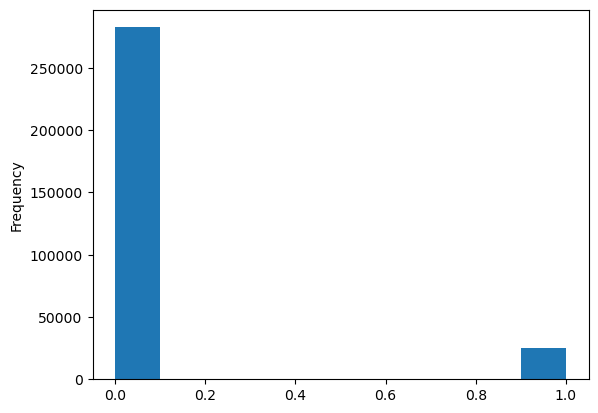

In [6]:
# Define target vector
y = df_loans["TARGET"]
y.astype(int).plot.hist()



In [7]:
y = df_loans["TARGET"].values.reshape(-1,1)
y[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]])

Split the data into training and testing sets.

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
random_oversampler= RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled= random_oversampler.fit_resample(X_train, y_train)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [10]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_resampled)

In [12]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_resampled)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [13]:
model = tree.DecisionTreeClassifier()

In [17]:
# Train the model
model = model.fit(X_train_scaled,y_resampled)

In [18]:
# make predictions
predictions = model.predict (X_test_scaled)

In [19]:
# Accuracy Score
acc_score = accuracy_score(y_test,predictions)
print(f"{acc_score:.2f}")

0.86


In [20]:
#Classification Report
classification_rep = classification_report(y_test,predictions)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     70749
           1       0.14      0.14      0.14      6129

    accuracy                           0.86     76878
   macro avg       0.53      0.53      0.53     76878
weighted avg       0.86      0.86      0.86     76878



In [28]:
import tensorflow as tf
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=25))
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                520       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_resampled, epochs=50)

Epoch 1/50
13247/13247 [==============================] - 6s 434us/step - loss: 0.6309 - accuracy: 0.6454
Epoch 2/50
13247/13247 [==============================] - 6s 431us/step - loss: 0.6187 - accuracy: 0.6593
Epoch 3/50
13247/13247 [==============================] - 6s 428us/step - loss: 0.6150 - accuracy: 0.6636
Epoch 4/50
13247/13247 [==============================] - 6s 430us/step - loss: 0.6132 - accuracy: 0.6658
Epoch 5/50
13247/13247 [==============================] - 6s 426us/step - loss: 0.6118 - accuracy: 0.6669
Epoch 6/50
13247/13247 [==============================] - 6s 430us/step - loss: 0.6109 - accuracy: 0.6678
Epoch 7/50
13247/13247 [==============================] - 6s 430us/step - loss: 0.6100 - accuracy: 0.6687
Epoch 8/50
13247/13247 [==============================] - 6s 429us/step - loss: 0.6092 - accuracy: 0.6693
Epoch 9/50
13247/13247 [==============================] - 6s 429us/step - loss: 0.6085 - accuracy: 0.6697
Epoch 10/50
13247/13247 [=====================

In [15]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [16]:
# Fit the model
model = model.fit(X_train_scaled, y_resampled)

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [21]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [22]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [23]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


Predicted 0  Predicted 1
Actual 0        65128         5621
Actual 1         5250          879

Accuracy Score : 0.858594136163792
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     70749
           1       0.14      0.14      0.14      6129

    accuracy                           0.86     76878
   macro avg       0.53      0.53      0.53     76878
weighted avg       0.86      0.86      0.86     76878



In [28]:
# Random Forests in sklearn will automatically calculate feature importance
importances = model.feature_importances_
# We can sort the features by their importance
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted = importances_sorted[:30]
sorted_df = pd.DataFrame(importances_sorted)
sorted_df[1]

0                    EXT_SOURCE_3
1                      DAYS_BIRTH
2               DAYS_REGISTRATION
3                 DAYS_ID_PUBLISH
4                     AMT_ANNUITY
5          DAYS_LAST_PHONE_CHANGE
6                    EXT_SOURCE_1
7      REGION_POPULATION_RELATIVE
8                      AMT_CREDIT
9                AMT_INCOME_TOTAL
10                AMT_GOODS_PRICE
11        HOUR_APPR_PROCESS_START
12                  DAYS_EMPLOYED
13                 TOTALAREA_MODE
14                  DAYS_EMPLOYED
15    YEARS_BEGINEXPLUATATION_AVG
16     AMT_REQ_CREDIT_BUREAU_YEAR
17                    OWN_CAR_AGE
18       OBS_60_CNT_SOCIAL_CIRCLE
19       OBS_30_CNT_SOCIAL_CIRCLE
20                CNT_FAM_MEMBERS
21      AMT_REQ_CREDIT_BUREAU_MON
22      AMT_REQ_CREDIT_BUREAU_QRT
23       DEF_30_CNT_SOCIAL_CIRCLE
24                   CNT_CHILDREN
Name: 1, dtype: object

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

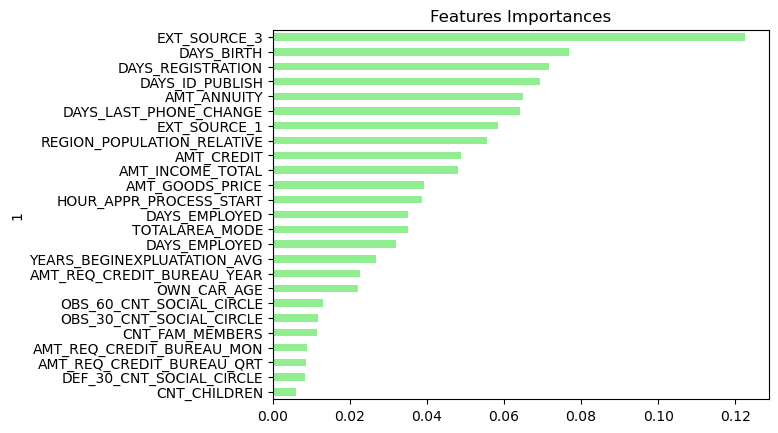

In [26]:
sorted_df.set_index(sorted_df[1], inplace=True)
sorted_df.drop(columns=1, inplace=True)
sorted_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = sorted_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0454004 to fit



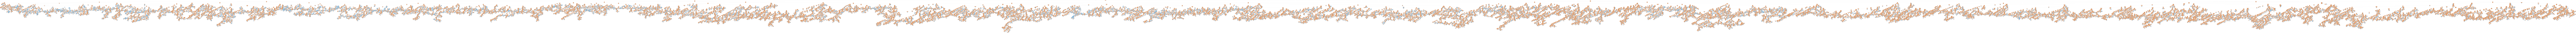

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [ ]:
# # When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# # Saving the tree as PDF
# file_path = "../Resources/transactions_tree.pdf"
# graph.write_pdf(file_path)

# # Saving the tree as PNG
# file_path = "../Resources/transactions_tree.png"
# graph.write_png(file_path)


## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

 * **Sample Answer:** After observing the results, the accuracy seems to be good enought to start exploring this kind of algorithms in a bank, however, I would prefer to start running a pilot with new data to assess model's reliability.